In [1]:
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
numerical_columns = list(data.loc[:,['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
categorical_columns = list(data.loc[:,['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

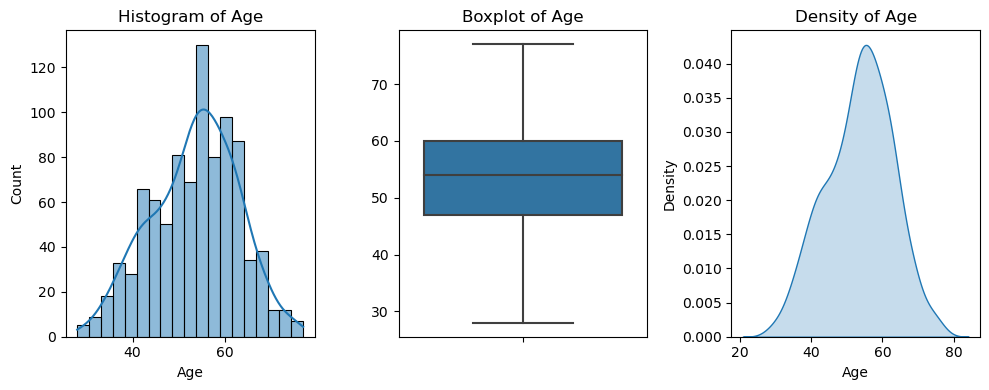

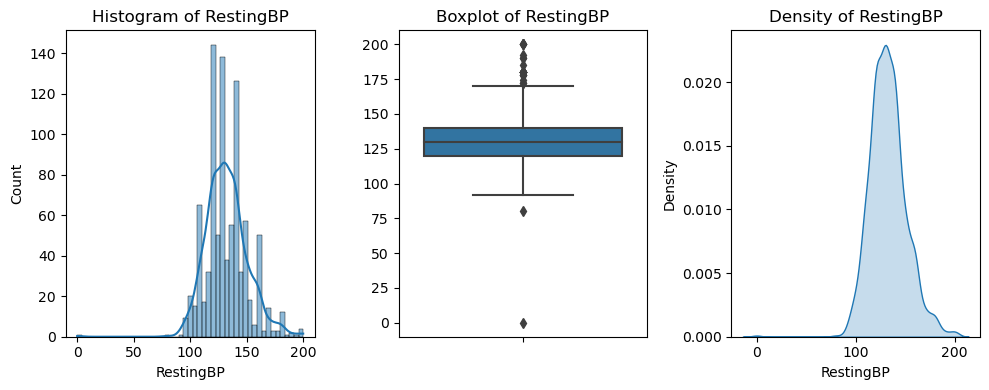

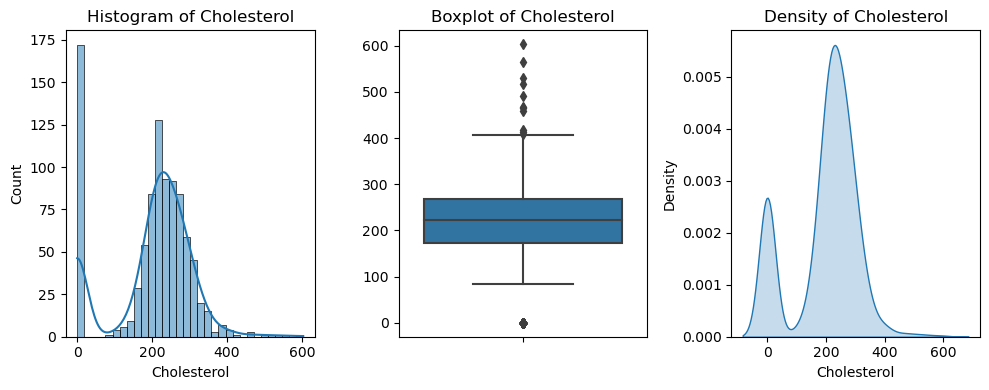

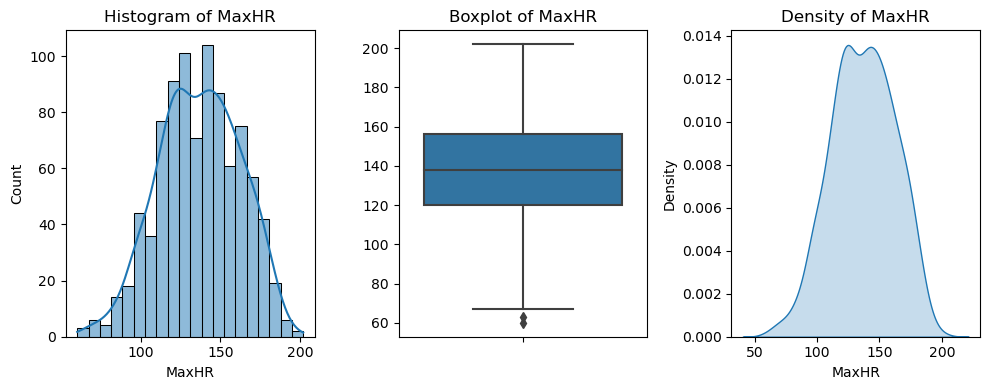

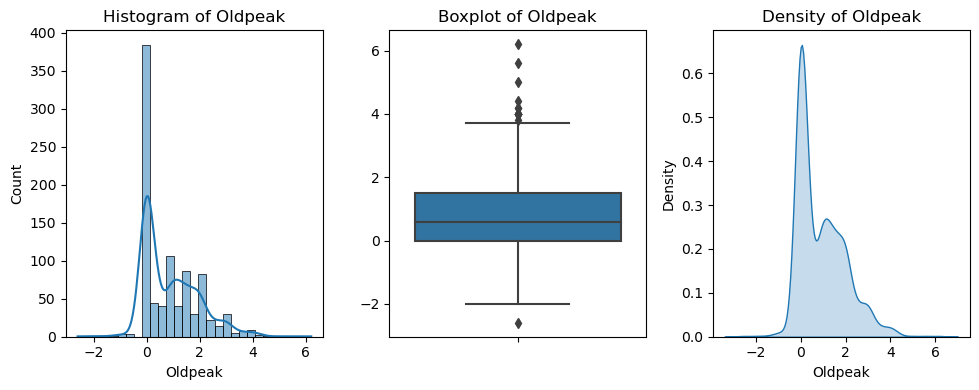

In [5]:
for column in numerical_columns:
  plt.figure(figsize=(10,4))

  #Histogram
  plt.subplot(131)
  sns.histplot(data[column], kde=True)
  plt.title("Histogram of {}".format(column))

  #Boxplot
  plt.subplot(132)
  ax = sns.boxplot(data=data, y=column)
  ax.set(ylabel=None)
  plt.title("Boxplot of {}".format(column))

  #Density
  plt.subplot(133)
  sns.kdeplot(data[column], fill=True)
  plt.title("Density of {}".format(column))

  plt.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Rate of Heart Disease')

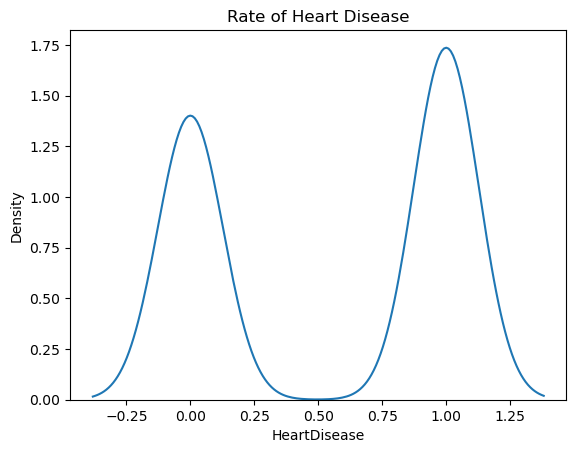

In [6]:
sns.kdeplot(x = "HeartDisease", data = data)
plt.title("Rate of Heart Disease")

In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
encoder = LabelEncoder()

data["Sex"] = encoder.fit_transform(data["Sex"])
data["ChestPainType"] = encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = encoder.fit_transform(data["ST_Slope"])

In [9]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [13]:
X=data.drop(["HeartDisease"], axis =1)
Y=data["HeartDisease"]
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [18]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [20]:
prediction_on_training=model.predict(X_train)
accuracy_on_training=accuracy_score(Y_train, prediction_on_training)
print(accuracy_on_training)

0.8433242506811989
